## Redes sociais - APS(1)

Diogo Duarte, Pedro Dannecker e Gabriel de Araújo Alves



### Importando bibliotecas

In [24]:
import pandas as pd
import csv
from graph_tool import Graph
import os
from graph_tool import util
# from netpixi.data.gt import *
# import netpixi
import netpixi

from netpixi.integration.gt import *

### Analisando os dados iniciais

In [25]:
import re
import pandas as pd

#first u have to open  the file and seperate every line like below:

df = open('wiki-RfA.txt', "r")
lines = df.readlines()
df.close()

# remove /n at the end of each line
for index, line in enumerate(lines):
       lines[index] = line.strip()

lines



# #creating a dataframe(consider u want to convert your data to 2 columns)

df_result = pd.DataFrame(columns=('SRC','TGT','VOT','RES','DAT','TXT'))
list_src=[]
list_tgt=[]
list_vot=[]
list_res=[]
list_dat=[]
list_txt=[]

for line in lines:
    if line.split(':')[0]=='SRC':
        list_src.append(line.split(':')[-1])
    elif line.split(':')[0]=='TGT':
        list_tgt.append(line.split(':')[-1])
    elif line.split(':')[0]=='VOT':
        list_vot.append(line.split(':')[-1])
    elif line.split(':')[0]=='RES':
        list_res.append(line.split(':')[-1])
    elif line.split(':')[0]=='DAT':
        list_dat.append(line.split(':')[-1])
    elif line.split(':')[0]=='TXT':
        list_txt.append(line.split(':')[-1])
    elif line.split(':')[0]==' ':
        pass

df_result['SRC']=list_src
df_result['TGT']=list_tgt
df_result['VOT']=list_vot
df_result['RES']=list_res
df_result['DAT']=list_dat
df_result['TXT']=list_txt

df_result

,SRC,TGT,VOT,RES,DAT,TXT
0,Steel1943,BDD,1,1,"13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,"04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,"43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,"11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,"56, 20 April 2013",GOCE|Guild of Copy Editors]] (where we're both...
...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,"51, 2 Sep 2003",Support
198271,Angela,WhisperToMe,1,1,"45, 26 Nov 2003",Support.
198272,Jiang,WhisperToMe,1,1,,Support. --
198273,Pakaran,WhisperToMe,1,1,"38, 5 Dec 2003",Support. Age has nothing to do with maturity....


In [26]:
df_result['SRC']=df_result['SRC'].replace('','Unknown')
df_result['SRC'].value_counts()

Unknown           1661
Siva1979          1232
Mailer diablo      998
Merovingian        916
Wizardman          810
                  ... 
Nunquam Dormio       1
Eastlaw              1
Yossiea              1
P.wormer             1
Nydigoveth           1
Name: SRC, Length: 10415, dtype: int64

In [27]:
list_voters=df_result['SRC'].value_counts().index

In [28]:
len(df_result.SRC[df_result.SRC=='Siva1979'])

1232

In [29]:
len(df_result.SRC[df_result.SRC=='Steel1943'])

4

In [30]:
len(df_result.SRC[df_result.SRC=='Unknown'])

1661

#### Retirando valores neutros da  coluna VOT

In [31]:
df_result_new=df_result[df_result.VOT!='0']


In [32]:
list_targets=df_result_new.TGT.unique()


### Criando o grafo

In [33]:
from netpixi.integration.gt import Graph

g = Graph(directed=True) # dirigido

### Criando vertices

In [34]:
for voter in list_voters:
    g.add_vertex(voter)

In [35]:
print('número de vértices de g:', g.num_vertices())

número de vértices de g: 10415


### Adicionando propriedades aos vértices

In [36]:
values_voters=df_result.SRC.value_counts().values

for voter,value in zip(list_voters,values_voters):
    g.add_gp(voter)
    g[voter]=value 

### Criando arestas

In [37]:
# for i in range(len(list_voters)-1):
#     for j in range(len(list_voters)-2):
#         j=i+1
#         if list_voters[j]>list_voters[i]:
#             g.add_edge(list_voters[i],list_voters[j])
#         else:
#             g.add_edge(list_voters[j],list_voters[i])    


for i in range(len(list_voters)-1):
    if list_voters[i]>list_voters[i+1]:
        g.add_edge(list_voters[i],list_voters[i+1])
    else:
        g.add_edge(list_voters[i+1],list_voters[i])  

### Analise exploratoria

#### a)número de vértices, número de arestas, densidade;

In [38]:
#número de vértices
n = g.num_vertices()
print('O número de vértices é {0}'.format(n))

O número de vértices é 10415


In [39]:
#número de arestas
m = g.num_edges()
print('O número de arestas é {0}'.format(m))

O número de arestas é 10414


In [40]:
##densidade
if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2

d = m / max_edges
print('A densidade é {0}'.format(round(d,4)))

A densidade é 0.0001


#### b)estatísticas e histograma do degree. (não é necessário in-degree e out-degree)

In [41]:
data_targets = pd.DataFrame({k: list(v) for k, v in g.vp.items()})
data_targets

,id
0,Unknown
1,Siva1979
2,Mailer diablo
3,Merovingian
4,Wizardman
...,...
10410,Nunquam Dormio
10411,Eastlaw
10412,Yossiea
10413,P.wormer


In [42]:
degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())

data_targets['degree'] = degrees
data_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415 entries, 0 to 10414
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10415 non-null  object
 1   degree  10415 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 162.9+ KB


count    10415.000000
mean         1.999808
std          0.013857
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: degree, dtype: float64

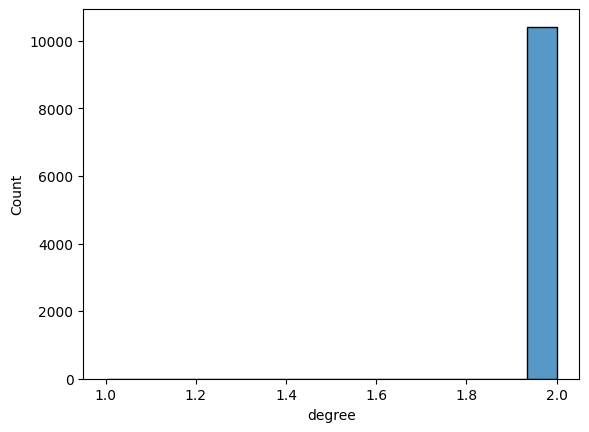

In [43]:
import seaborn as sns
sns.histplot(data_targets['degree'])
data_targets['degree'].describe()

### Análise visual do grafo:











#### salve o grafo em um arquivo;

In [57]:
gt_save(g, 'Rfa.net.gz')
g = gt_clean(g)


#### visualize o grafo a partir desse arquivo,algoritmo baseado em force-directed graph drawing;



In [54]:
g = gt_load('../notebooks/Rfa.net.gz')
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
r=netpixi.render('Rfa.net.gz',infinite=True);

#### Propriedades e tipos

In [55]:
netpixi.peek('../notebooks/Rfa.net.gz')

GRAPH
    description: str
    readme: str
VERTEX
    label: str
    value: str
EDGE
    no properties


#### ajuste as propriedades visuais do grafo

In [56]:
# mudar a cor de fundo do grafo
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x000000, size=10)

# mudar um vértice específico a partir de seu id
r.vertex(0, color=0xff0000, size=20)
r.vertex(1, color=0xff0000, size=20)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=1, curve1=1, curve2=1)

# mudar uma aresta específica a partir dos ids de sua origem e destino
r.edge(0, 1, color=0x0000ff, width=2)